In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
#Importing and creating dataframe
df = pd.read_csv(r"D:\python\Machine_learning\Ridge Lassso Elastic Regression Practicals\Algerian_forest_fires_dataset_UPDATE.csv", header = 1)
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [54]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
dtypes: str(14)
memory usage: 27.0 KB


## Data cleaning

In [55]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [56]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1
df['Region'] = df['Region'].astype('int16')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [57]:
#dropping the null values
df = df.dropna().reset_index(drop = True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [58]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [59]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [60]:
df =df.drop([122]).reset_index(drop = True)

In [61]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [62]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='str')

In [63]:
#Fixing the spaces in the columns names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [64]:
[features for features in df.columns if df[features].dtype == 'str']

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [65]:
#Changing required columns to int datatype
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws' ]] = df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws' ]].astype('int32')

In [66]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          243 non-null    int32
 1   month        243 non-null    int32
 2   year         243 non-null    int32
 3   Temperature  243 non-null    int32
 4   RH           243 non-null    int32
 5   Ws           243 non-null    int32
 6   Rain         243 non-null    str  
 7   FFMC         243 non-null    str  
 8   DMC          243 non-null    str  
 9   DC           243 non-null    str  
 10  ISI          243 non-null    str  
 11  BUI          243 non-null    str  
 12  FWI          243 non-null    str  
 13  Classes      243 non-null    str  
 14  Region       243 non-null    int16
dtypes: int16(1), int32(6), str(8)
memory usage: 21.5 KB


In [67]:
colm = [features for features in df.columns if df[features].dtype == 'str']
for i in colm:
    if i != 'Classes':
        df[i] = df[i].astype('float32')

In [68]:
df.info() 

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float32
 7   FFMC         243 non-null    float32
 8   DMC          243 non-null    float32
 9   DC           243 non-null    float32
 10  ISI          243 non-null    float32
 11  BUI          243 non-null    float32
 12  FWI          243 non-null    float32
 13  Classes      243 non-null    str    
 14  Region       243 non-null    int16  
dtypes: float32(7), int16(1), int32(6), str(1)
memory usage: 14.8 KB


In [69]:
df.to_csv('Algerian_forest_fire.csv')

## Exploratory Data Analysis

In [70]:
df_copy = df.copy()


In [71]:
df_copy.drop(columns = ['day', 'month', 'year'], inplace = True)

In [72]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire,0


In [73]:
df_copy['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: str

In [74]:
df_copy[df_copy['Classes'].str.contains('fire')]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.400002,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.099998,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.900002,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.699997,4.3,15.2,1.7,5.1,0.7,not fire,1


In [75]:
#Encoding of the categories in 'Classes'
cond = [df_copy['Classes'].str.contains('not fire'),
        df_copy['Classes'].str.contains('fire')  ]


choice = [0, 1]

df_copy['Classes'] = np.select(cond, choice)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,0,0


In [76]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## Visualisation

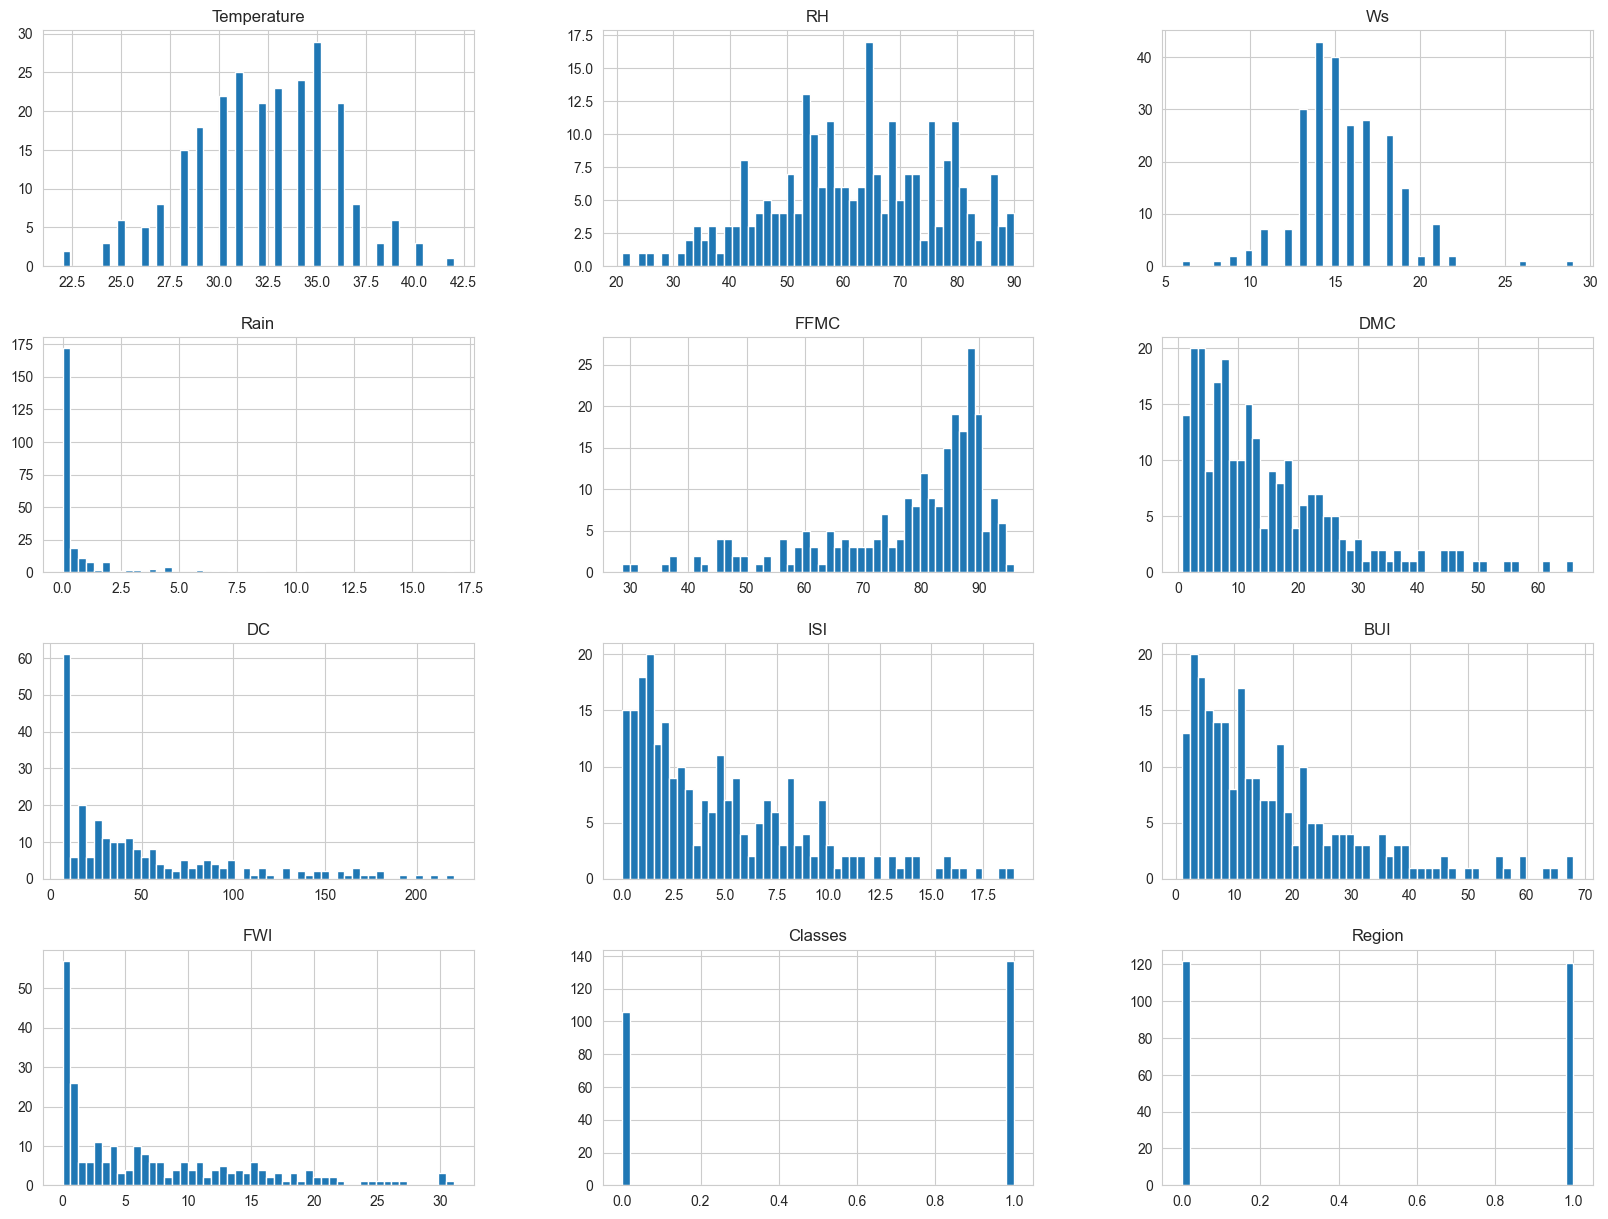

In [77]:
## Plot density plot for all features

# plt.style.use('seaborn')
df_copy.hist(bins=50, figsize = (20, 15))
plt.show()

In [78]:
## Percentage Pie chart
percen = df_copy['Classes'].value_counts(normalize=True)*100

([<matplotlib.patches.Wedge at 0x2aea221fc50>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'Fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'Not Fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

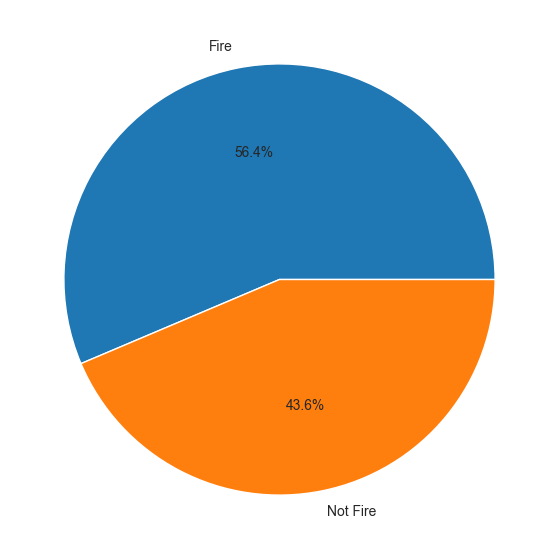

In [79]:
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(12, 7))
plt.pie(percen, labels = classlabels, autopct = '%1.1f%%')

## Correlation

In [80]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


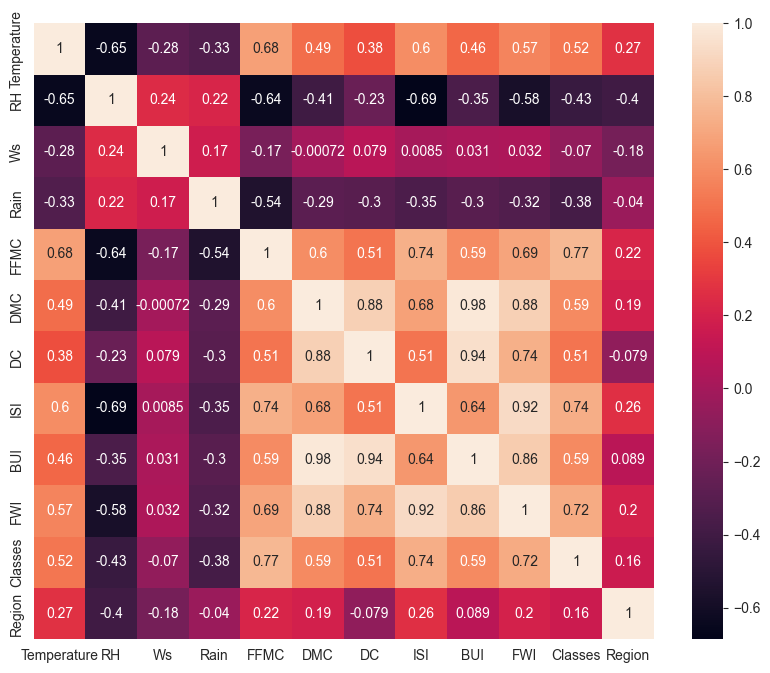

In [81]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

<Axes: ylabel='FWI'>

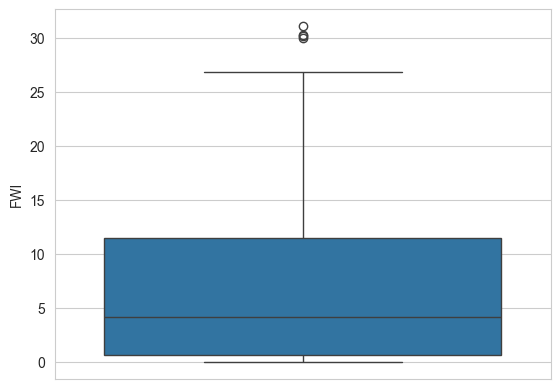

In [82]:
## Box ploits
sns.boxplot(df_copy['FWI'])

In [86]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

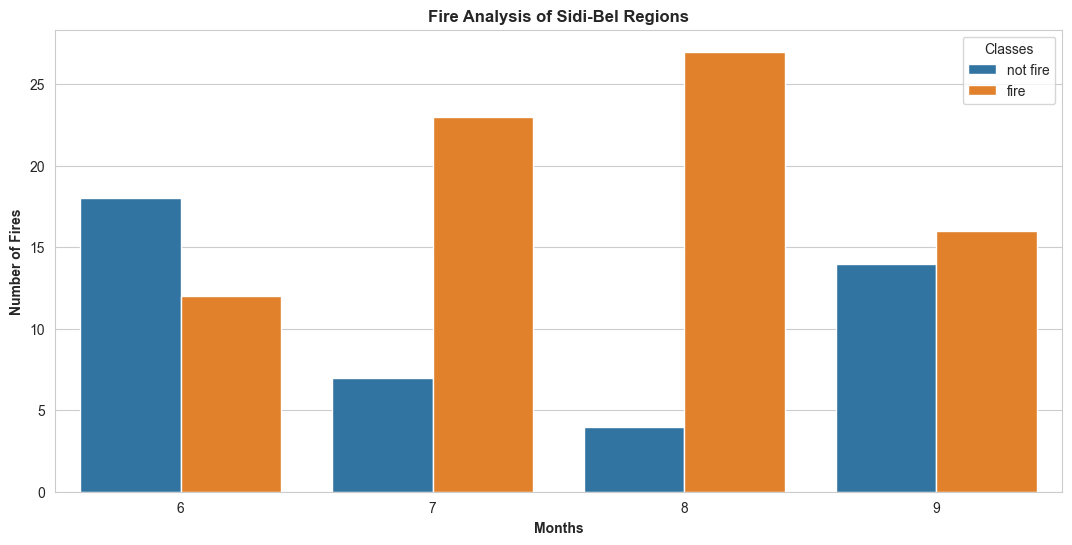

In [93]:
dftemp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = dftemp)
plt.ylabel('Number of Fires', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title('Fire Analysis of Sidi-Bel Regions', weight = 'bold')

Text(0.5, 1.0, 'Fire Analysis of Bjaija Regions')

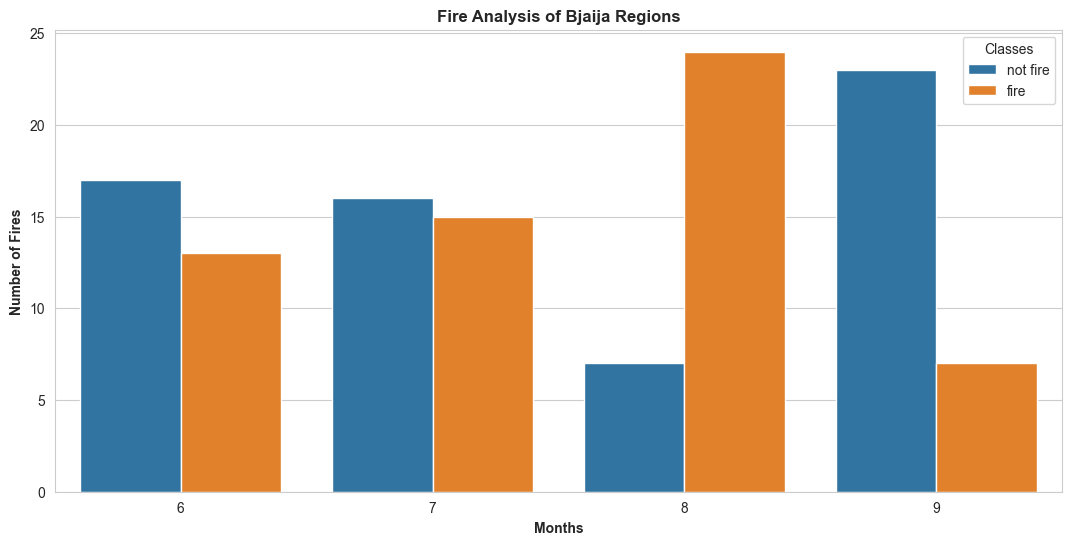

In [94]:
dftemp = df.loc[df['Region'] == 0]
plt.subplots(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = dftemp)
plt.ylabel('Number of Fires', weight = 'bold')
plt.xlabel('Months', weight = 'bold')
plt.title('Fire Analysis of Bjaija Regions', weight = 'bold')